In [1]:
from main import setup
import yaml
import pathlib
import torch
import matplotlib.pyplot as plt

INFO:2024-01-09 21:30:05 987927:987927 init.cpp:158] If you see CUPTI_ERROR_INSUFFICIENT_PRIVILEGES, refer to https://developer.nvidia.com/nvidia-development-tools-solutions-err-nvgpuctrperm-cupti


In [2]:
def load(path):
    hparam = path + "/hparam.yaml"
    config = yaml.safe_load(open(hparam))
    sampler, optim, scheduler = setup(config)

    progress = torch.load(f"{path}/progress_9000.pth")
    sampler.load_state_dict(progress["sampler"])
    optim.load_state_dict(progress["optim"])

    return config, sampler, optim


In [3]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/24-01-09-15:59:30")
samples = sampler.sample(1000, loss_fn="var", correct=False, repel=False, a=1.0)
config['loss_fn'], config['repel']
samples.ln_z, samples.elbo, 

(tensor(40.1862, device='cuda:0', grad_fn=<SubBackward0>),
 tensor(34.8892, device='cuda:0', grad_fn=<MeanBackward0>))

In [6]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/23-12-25-22:14:27")
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=True)
config['loss_fn'], config['repel']



RuntimeError: Error(s) in loading state_dict for CMCD:
	Missing key(s) in state_dict: "ln_a_0", "ln_a_1". 

In [6]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/23-12-26-05:53:23")
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=False)
config['loss_fn'], config['repel']
samples.ln_z



FileNotFoundError: [Errno 2] No such file or directory: '/home/brianlck/code/code/dissertation/logs/dw/23-12-26-05:53:23/progress_9000.pth'

In [5]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/23-12-29-15:31:34")
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=False)
config['loss_fn'], config['repel']
samples.ln_z


FileNotFoundError: [Errno 2] No such file or directory: '/home/brianlck/code/code/dissertation/logs/dw/23-12-29-15:31:34/progress_9000.pth'

In [1]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/24-01-09-15:59:30")
samples2 = sampler.sample(500, loss_fn="mean", correct=False, repel=False)
config['loss_fn'], config['repel']



NameError: name 'load' is not defined

tensor(-49.1208, device='cuda:0', grad_fn=<SubBackward0>) tensor(63.3318, device='cuda:0', grad_fn=<MeanBackward0>)


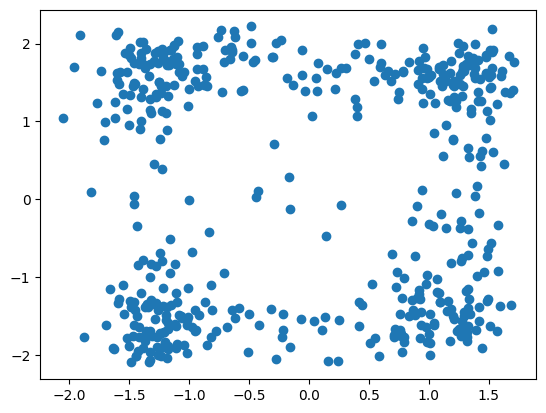

In [6]:
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=False)

print(samples.ln_z, samples.loss)

plt.scatter(samples.particles[:, 1].detach().cpu().numpy(), samples.particles[:, 3].detach().cpu().numpy())

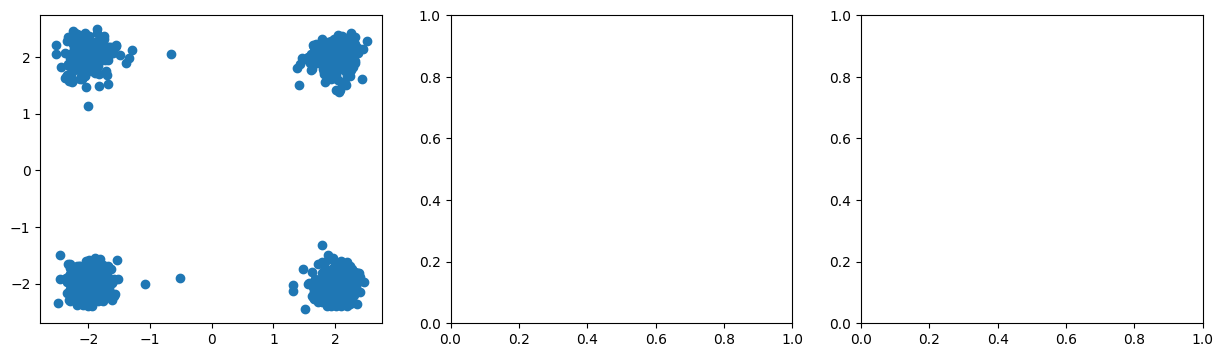

KeyboardInterrupt: 

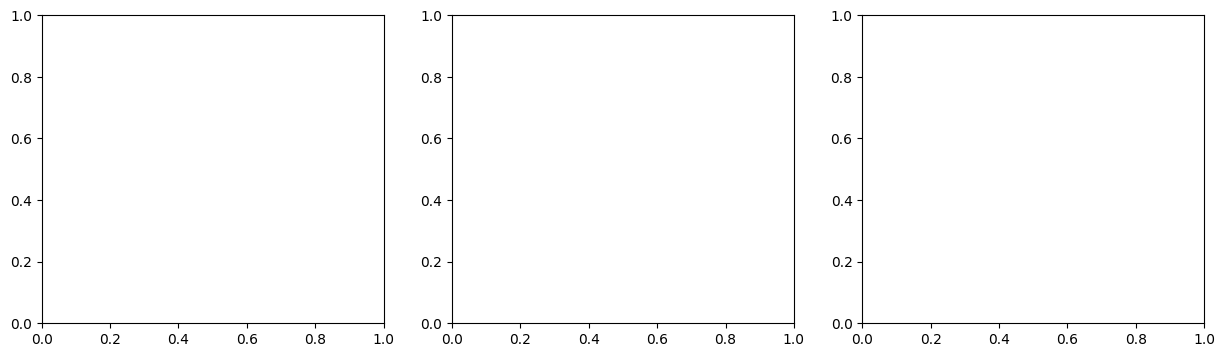

In [16]:
for i in range(50):
    for j in range(50):
        if i != j:
            fig = plt.figure(3, figsize=(15,4))
            subfig = fig.subplots(1, 3)
            subfig[0].scatter(samples.particles[:, i].detach().cpu().numpy(), samples.particles[:, j].detach().cpu().numpy())
            # subfig[1].scatter(samples2.particles[:, i].detach().cpu().numpy(), samples2.particles[:, j].detach().cpu().numpy())
            plt.show()